In [1]:
import tensorflow as tf

In [2]:
# Other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-05-31 21:57:55--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.2’

moore.csv.2         100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-05-31 21:57:55 (36.0 MB/s) - ‘moore.csv.2’ saved [2302/2302]



In [4]:
# Load in the data
data = pd.read_csv("moore.csv").to_numpy()

In [5]:
data

array([[       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,      385000],
       [       1987,

In [6]:
X = data[:,0].reshape(-1,1) # making an N x D matrix
Y = data[:,1]

The purpose of this code is to transform the one-dimensional array obtained from data[:,0] into a two-dimensional matrix with a single column.This transformation is often needed in machine learning tasks, where the input data is expected to be in the form of a matrix.


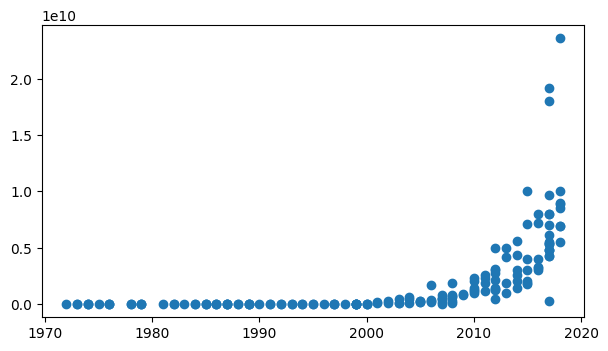

In [7]:
# Plot the data 
plt.figure(figsize=(7,3.8))
plt.scatter(X, Y);

This is a clear example of exponential growth. The high values are so high that they make initial values to look like 0. Since we'll be using a linear model, we'll be taking log of it, so we'll get a linear line.

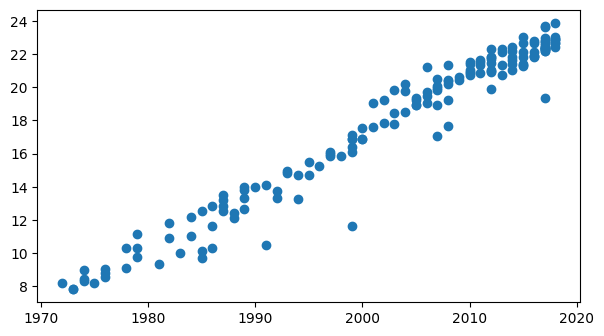

In [8]:
Y = np.log(Y)
plt.figure(figsize=(7,3.8))
plt.scatter(X,Y);

You see that we have a range from 1970 to 2020. In machine learning, generally this is not good. We'd like to shift the data by its mean and divide by the standard deviation to standardize it.

In [18]:
# We want divide by std here
X = X - X.mean()

In [15]:
X[:5]

array([[-30.39130435],
       [-29.39130435],
       [-29.39130435],
       [-28.39130435],
       [-28.39130435]])

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [19]:
model.compile(                          # Input learning rate of the function below (lr)
    optimizer=tf.keras.optimizers.SGD(0.001,0.9), # we did not use adam, bc we didn't scale the data
    loss="mse",
)

In [20]:
# We'll create our own learning rate schedule function
def schedule(epoch, lr):
    if epoch > 50:
        return 0.0001
    return 0.001
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [21]:
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 4ms/step - loss: 697.1806 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 600.1415 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 467.3123 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 257.6181 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 296.3076 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 171.7462 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 117.0780 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 91.1168 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 52.7797 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 48.5559 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 

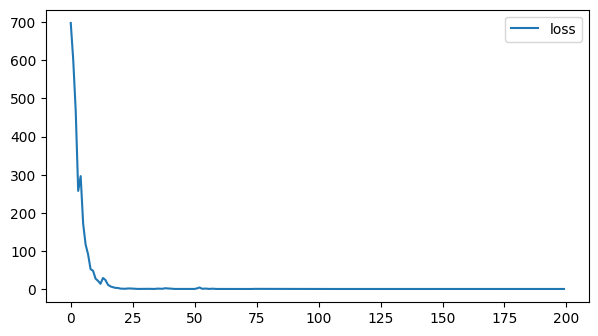

In [23]:
# Plot the loss
plt.figure(figsize=(7,3.8))
plt.plot(r.history["loss"], label="loss")
plt.legend();

In [24]:
model.layers

In [26]:
model.layers[0].get_weights()

[array([[0.345393]], dtype=float32), array([17.815105], dtype=float32)]

In [29]:
a = model.layers[0].get_weights()[0][0,0]

In [31]:
a

0.345393